In [25]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
from erddapy import ERDDAP
import json

Configure the ERDDAP to search

In [26]:
ra = 'glos'

with open('utils/ra_erddaps.json') as f:
    urls = json.load(f)

server = urls[ra.lower()]

print(server)

e = ERDDAP(server=server, protocol="tabledap")

https://seagull-erddap.glos.org/erddap


Pull in the processed inventory

In [27]:
#
# df_cruise = df[df['Station Description'] == 'Chesapeake Bay WQ Cruise Data ']
#
#df_aws = df[df['Station ID'] == 'Humboldt']
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/OMOECC_E1/OMOECC_E1.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/45186/45186.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/bgsusd2/bgsusd2.ncml'
# url = 'http://oos.soest.hawaii.edu/thredds/dodsC/hioos/nss/ns12agg'
# print(url)
# ds = xr.open_dataset(url)
# #ds = netCDF4.Dataset(url,'r')
# title = ds.title
# start_time = np.datetime_as_string(ds.time.min().values, unit='D')
# end_time = np.datetime_as_string(ds.time.max().values, unit='D')
# print('Duration: %s - %s' % (np.datetime_as_string(ds.time.min().values, unit='D'),
#                              np.datetime_as_string(ds.time.max().values, unit='D'))
#       )

# Try glos web server
# url = 'https://glbuoys.glos.us/tools/export?ftype=csv&data_type=buoy&units=eng&locs=OMOECC_E1&params=Water_Temperature_at_Surface|dissolved_oxygen_saturation|water_conductivity|ysi_turbidity&tperiod=custom&date_start=2020-01-01&date_end=2020-12-31&avg_ivld=none'
# df = erddapy.ERDDAP.to_pandas(url)

## using ERDDAP to look for stations
# check out http://data.glos.us/erddap/tabledap/allDatasets.htmlTable?datasetID%2Ctitle%2CminTime%2CmaxTime&maxTime%3E=2020-01-01&maxTime%3C=2020-12-31&orderBy(%22maxTime%22)
# that lists out all the GLOS stations with the maximum time of observations within the year 2020 (on their ERDDAP).

df = pd.read_excel('2022/data/processed/%s.xlsx' % ra.upper(), dtype=str)
df

,RA,Station ID,Dataset (ERDDAP) ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)","RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes
0,GLOS,45013,obs_2,45013,"Station 45013 - Atwater Park, WI",Milwaukee Buoy ATW20 (45013),43.1,-87.85,moored_buoy,2011-08-12 00:00:00,Y,Yf,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, wind_speed_o...",NaN
1,GLOS,45014,obs_43,45014,"Station 45014 - GB17 - South Green Bay, WI",Green Bay Buoy GB17 (45014),44.8,-87.76,moored_buoy,2011-08-12 00:00:00,Y,Yf,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, wind_speed_of...",NaN
2,GLOS,45022,obs_61,45022,"Station 45022 - Little Traverse Bay, MI",Little Traverse Bay Buoy U-GLOS 004 (45022),45.403,-85.088,moored_buoy,2009-07-29 00:00:00,Y,Yf,University of Michigan CIGLR,academic,"wind_from_direction, wind_speed, wind_speed_of...",NaN
3,GLOS,45023,obs_44,45023,"Station 45023 - North Entry Buoy, North Keween...",North Entry MTU Buoy (45023),47.27,-88.607,moored_buoy,2010-07-08 00:00:00,Y,Yf,Michigan Tech University,academic,"wind_from_direction, wind_speed, wind_speed_o...",NaN
4,GLOS,45024,obs_62,45024,"Station 45024 - Ludington Buoy, MI",Ludington Buoy (45024),43.977,-86.559,moored_buoy,2009-08-04 00:00:00,Y,Yf,University of Michigan CIGLR,academic,"wind_from_direction, wind_speed, wind_speed_of...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,GLOS,WIM_832,NaN,NaN,HW_Algonac,NaN,42.6211,-82.5267,fixed,2007,Y,N,Wayne State University,academic,mass_concentration_of_chlorophyll_in_sea_water...,NaN
118,GLOS,WIM_968,NaN,NaN,HW_Monroe,NaN,41.947181,-83.255645,fixed,2007,Y,N,Wayne State University,academic,"phycocyanin_concentration, phycocyanin_fluore...",NaN
119,GLOS,WLE-ESP,obs_89,NaN,WLE-ESP,Nutrient buoy in Western Lake Erie deployed ne...,41.7351,-83.3007,moored_buoy,2021-05-08 00:00:00,Y,Yp,Great Lakes Environmental Research Laboratory,gov_federal,"wind_from_direction,wind_speed,wind_speed_of_g...",NaN
120,GLOS,WSLM4,obs_10,WSLM4,"Station WSLM4 - White Shoal Light, MI",Lake Michigan Evaporation and Meteorological D...,45.842,-85.135,tower,2016-02-22 00:00:00,Y,Yp,Great Lakes Environmental Research Lab,gov_federal,"wind_from_direction, wind_speed, air_pressure_...",NaN


Search the ERDDAP server for a single station of interest - more of a test

In [28]:
# df['Station ID'].loc[df['Station ID'].isna()] = df.loc[df['Station ID'].isna(),'Dataset ID']

# df['Station ID']

In [29]:
# df_wf = df[df['Station ID'] == 'Jug_Bay']

# # for SCCOOS need to search for 'Station Long Name' as 'Station ID' is NA for most entries
# search_for = df_wf['Station ID'].to_string()

# search_url = e.get_search_url(search_for=search_for, response="csv")

# try:
#     resp = pd.read_csv(search_url)
#     print(resp['Station ID'])
# except:
#     pass

Rip through all the datasets in the inventory and see if they exist on the RA erddap. Process checks the following order:

1. `Station ID`, then 
2. `Station Long Name`, then
3. `WMO ID or NWS/CMAN ID`

We first check if the value is `nan`. If so, we punt as that will return all datasets from the ERDDAP service.

In [30]:
not_found = []
found = dict()

exclude = ' -gliders'

#search_order = ['Station ID', 'Station Long Name', 'WMO ID or NWS/CMAN ID']

# GLOS
search_order = ['Station ID', 'Station Long Name', 'WMO ID or NWS/CMAN ID']
# SCCOOS
#search_order = ['Station Long Name', 'WMO ID or NWS/CMAN ID', 'Station Description']

for search1 in df[search_order[0]].astype(str):
    
    if search1 == "nan":
        print("punting with %s = nan\n" % search_order[0])
        not_found.append(search1)
        continue
    
    try:
        print('searching \"%s\" = \"%s\"' % (search_order[0], search1))
        search_url = e.get_search_url(search_for=search1+exclude, response="csv")
        resp = pd.read_csv(search_url)
        
        print("Found \"%s\": %s" % (search1,resp['Dataset ID'].values.tolist()))
        
        found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
        
    except:
        
        print('no dataset matching \"%s\"' % search1)
        search2 = df.loc[df[search_order[0]] == search1, search_order[1]].values.tolist()[0]
        
        if search2 == "nan":
                print("punting with %s = nan\n" % search_order[1])
                not_found.append(search1)
                continue
                
        try:
            
            print('searching \"%s\" = \"%s\"' % (search_order[1], search2))
            search_url = e.get_search_url(search_for=search2+exclude, response="csv")
            resp = pd.read_csv(search_url)
            print("Found \"%s\": %s" % (search2,resp['Dataset ID'].values.tolist()))
            
            found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
            
        except:

            search3 = str(df.loc[df[search_order[0]] == search1, search_order[2]].values.tolist()[0])
            
            if search3 == "nan":
                print("punting with \"%s\" = nan\n" % search_order[2])
                not_found.append(search1)
                continue
            
            try:
                print('searching \"%s\" = \"%s\"' % (search_order[2], search3))
                search_url = e.get_search_url(search_for=search3+exclude, response="csv")
                resp = pd.read_csv(search_url)
                print("Found \"%s\": %s" % (search3,resp['Dataset ID'].values.tolist()))
                
                found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
                
            except:
                print("Couldn't find:", [search1, search2, search3])
                not_found.append(search1)
        
    print("\n")

searching "Station ID" = "45013"
Found "45013": ['obs_2']


searching "Station ID" = "45014"
Found "45014": ['obs_43']


searching "Station ID" = "45022"
Found "45022": ['obs_61']


searching "Station ID" = "45023"
Found "45023": ['obs_44']


searching "Station ID" = "45024"
Found "45024": ['obs_62']


searching "Station ID" = "45025"
Found "45025": ['obs_46']


searching "Station ID" = "45026"
Found "45026": ['obs_33']


searching "Station ID" = "45027"
Found "45027": ['obs_42']


searching "Station ID" = "45028"
Found "45028": ['obs_45']


searching "Station ID" = "45029"
Found "45029": ['obs_3']


searching "Station ID" = "45161"
Found "45161": ['glisa_general_monthly_erie', 'glisa_general_monthly_ontario', 'obs_49']


searching "Station ID" = "45162"
Found "45162": ['obs_67']


searching "Station ID" = "45163"
Found "45163": ['obs_68']


searching "Station ID" = "45164"
Found "45164": ['obs_70']


searching "Station ID" = "45165"
Found "45165": ['obs_71']


searching "Station ID" =

punting with "WMO ID or NWS/CMAN ID" = nan

searching "Station ID" = "MBB"
Found "MBB": ['obs_195']


searching "Station ID" = "NCWB"
Found "NCWB": ['obs_229']


searching "Station ID" = "NEENAH"
Found "NEENAH": ['obs_205']


searching "Station ID" = "NICOLET"
Found "NICOLET": ['obs_145']


searching "Station ID" = "OKSI2"
Found "OKSI2": ['obs_114']


searching "Station ID" = "OMOECP_E1 "
no dataset matching "OMOECP_E1 "
searching "Station Long Name" = "Lake Erie - Central Basin 1 - OMECP Environmental Sensors"
Found "Lake Erie - Central Basin 1 - OMECP Environmental Sensors": ['obs_93']


searching "Station ID" = "OMOECP_O1"
no dataset matching "OMOECP_O1"
searching "Station Long Name" = "Lake Erie - Central Basin 1 - OMOECP Environmental Sensors"
punting with "WMO ID or NWS/CMAN ID" = nan

searching "Station ID" = "OMOECP_O2"
no dataset matching "OMOECP_O2"
searching "Station Long Name" = "Western Lake Ontario 2 - OMOECP Environmental Sensors"
punting with "WMO ID or NWS/CMAN ID" = n

Print the stations that we couldn't find.

In [31]:
len(not_found)

33

In [32]:
len(found)

89

Show me the record that has NaN for the first search element.

In [33]:
df.loc[df[search_order[0]].isna()]

,RA,Station ID,Dataset (ERDDAP) ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)","RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes


Now show me the stations, with identifiers, that we couldn't find.

In [34]:
df[df[search_order[0]].isin(not_found)]

,RA,Station ID,Dataset (ERDDAP) ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)","RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes
22,GLOS,45177,NaN,45177,Ohio St. Beach Buoy,NaN,41.894,-87.613,moored_buoy,>5 year,Y,N,Chicago Parks District,gov_municipal,"sea_water_turbidity, sea_surface_temperature, ...",NaN
35,GLOS,45176b,NaN,NaN,Cleveland Crib Bottom Sonde (45176b),Cleveland Crib Bottom Sonde (45176b),41.55,-81.765,fixed,2016-06-07 00:00:00,Y,N,LimnoTech,industry,"sea_water_electrical_conductivity, sea_water_p...",NaN
37,GLOS,BEACH2,NaN,NaN,Beach2 Buoy,NaN,42.126653,-80.14903,moored_buoy,2018,Y,N,Regional Science Consortium,nonprofit,"sea_water_temperature (1m), sea_water_specific...",NaN
38,GLOS,BEACH2_T,obs_4,NaN,Beach2 Meteorological Tower,NaN,42.126286,-80.147505,tower,2018,Y,N,Regional Science Consortium,nonprofit,"surface_downwelling_shortwave_flux_in_air, win...",NaN
39,GLOS,BEACH6,NaN,NaN,Beach6 Buoy,NaN,42.144335,-80.139368,moored_buoy,2018,Y,N,Regional Science Consortium,nonprofit,"sea_water_temperature (1m), sea_water_specific...",NaN
40,GLOS,BGUSD2,obs_79,NaN,Sandusky Bay buoy (bgsusd2),Sandusky Bay buoy (bgsusd2),41.496,-82.75,moored_buoy,2017-06-27 00:00:00,Y,N,Bowling Green State University,academic,"wind_from_direction, wind_speed, air_temperatu...",NaN
44,GLOS,DEFWTP,NaN,NaN,DefianceWTP,NaN,41.27916666666667,-84.385,fixed,2022-03-01 00:00:00,Y,N,City of Defiance,gov_municipal,"phosphate, nitrate, ammonia, sea_water_specif...",NaN
48,GLOS,GBEL,NaN,NaN,Green Bay Entrance Light Continuous Monitoring...,NaN,44.65389,-87.929722,fixed,>5 year,Y,N,NEW Water,gov_municipal,"depth (1m, 7.2m), sea_water_temperature (1m, 7...",NaN
49,GLOS,GBW-000,NaN,NaN,GBW000 at Mahon Creek,NaN,44.52615,-87.9429,fixed,2022-07-01 00:00:00,Y,Yf,University of Wisconsin-Green Bay,academic,"sea_water_temperature (1m), battery_voltage, l...",NaN
56,GLOS,HTLPBLA,NaN,NaN,HTLP Blanchard Creek Monitoring Station,NaN,41.05583333333333,-83.68805555555556,fixed,>5 year,Y,N,Heidelberg University,academic,"mass_concentration_of_oxygen_in_sea_water, fra...",NaN


Print out all the dataset IDs for the datasets that matched our criteria.

In [35]:
found

{'45013': {'Dataset ID': ['obs_2']},
 '45014': {'Dataset ID': ['obs_43']},
 '45022': {'Dataset ID': ['obs_61']},
 '45023': {'Dataset ID': ['obs_44']},
 '45024': {'Dataset ID': ['obs_62']},
 '45025': {'Dataset ID': ['obs_46']},
 '45026': {'Dataset ID': ['obs_33']},
 '45027': {'Dataset ID': ['obs_42']},
 '45028': {'Dataset ID': ['obs_45']},
 '45029': {'Dataset ID': ['obs_3']},
 '45161': {'Dataset ID': ['glisa_general_monthly_erie',
   'glisa_general_monthly_ontario',
   'obs_49']},
 '45162': {'Dataset ID': ['obs_67']},
 '45163': {'Dataset ID': ['obs_68']},
 '45164': {'Dataset ID': ['obs_70']},
 '45165': {'Dataset ID': ['obs_71']},
 '45167': {'Dataset ID': ['obs_99']},
 '45168': {'Dataset ID': ['obs_37']},
 '45169': {'Dataset ID': ['obs_216']},
 '45170': {'Dataset ID': ['obs_47']},
 '45174': {'Dataset ID': ['obs_57']},
 '45175': {'Dataset ID': ['obs_38']},
 '45176': {'Dataset ID': ['obs_72']},
 '45183': {'Dataset ID': ['obs_58']},
 '45184': {'Dataset ID': ['obs_60']},
 '45185': {'Dataset 

Check if each found dataset has coverage for specified CY

In [36]:
valid_datasets = []

cy = '2022'

for key in found:
    
    dataset_id = found[key]['Dataset ID']
    
    if len(dataset_id)>1:
        
        for dataset in dataset_id:
            
            e.dataset_id = dataset
    
            e.constraints = {
                 "time>=": "{}-01-01".format(cy)
            }
        
            e.variables = ['time']
    
            try:
                df_data = e.to_pandas(parse_dates=True)
                valid_datasets.extend([key])
                
            except:
                pass

                #print("No data for 2021 for %s: dataset ID %s" % (key,e.dataset_id))

    else:
        
        e.dataset_id = dataset_id[0]
    
        e.constraints = {
                         "time>=": "{}-01-01".format(cy)
                        }
        
        e.variables = ['time']
        
        try:
            
            df_data = e.to_pandas(parse_dates=True)

            valid_datasets.extend([key])

        except:
            pass

            #print("No data for 2021 for %s: dataset ID %s" % (key,e.dataset_id))

            
#for valid in sorted(set(valid_datasets)):
    
#     # drop qc vars
#     cols = [c for c in df_data.columns if 'qc' not in c]
#     cols = [c for c in cols if 'QARTOD' not in c]

#     df_data = df_data[cols]

#     # set index for plotting
#     df_data = df_data.set_index(df_data['time (UTC)'])

#     # plot
#     #df_data.plot(subplots=True, title=e.dataset_id,figsize=(20,20))

#     start_time = df_data['time (UTC)'].min()
#     end_time = df_data['time (UTC)'].max()

#     print('Dataset %s' % e.dataset_id)
#     print('Duration: %s - %s' % (start_time, end_time))

no_cov_datasets = found.keys() - sorted(set(valid_datasets))

print('Datasets without coverage for {}:\n{}'.format(cy,no_cov_datasets))

Datasets without coverage for 2022:
{'DGOWAK', 'WIM_349', 'MBB', '45169', 'NCWB', '45184', '45185', 'FOXR', 'ALGOMA'}


Show me the inventory metadata about the invalid stations:

In [37]:
bad_stations = df.loc[(df[search_order[0]].isin(no_cov_datasets)) | df[search_order[0]].isin(not_found)]

df['erddap_not_avail'] = df[search_order[0]].isin(bad_stations[search_order[0]])

df.loc[df['erddap_not_avail']]

,RA,Station ID,Dataset (ERDDAP) ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)","RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes,erddap_not_avail
17,GLOS,45169,NaN,45169,"Station 45169 - Lakewood Buoy, OH",Cleveland Wind Buoy (45169),41.615,-81.821,moored_buoy,2015-06-27 00:00:00,Y,N,LimnoTech,industry,"wind_from_direction, wind_speed, wind_speed_of...",NaN,True
22,GLOS,45177,NaN,45177,Ohio St. Beach Buoy,NaN,41.894,-87.613,moored_buoy,>5 year,Y,N,Chicago Parks District,gov_municipal,"sea_water_turbidity, sea_surface_temperature, ...",NaN,True
24,GLOS,45184,obs_60,45184,Green Bay East,Green Bay East (45184),44.55028,-87.95888,moored_buoy,2018-07-01 00:00:00,Y,N,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, sea_water_tem...",NaN,True
25,GLOS,45185,obs_59,45185,Green Bay West,Green Bay West (45185),44.57673,-87.98761,moored_buoy,2018-07-01 00:00:00,Y,N,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, sea_water_tem...",NaN,True
35,GLOS,45176b,NaN,NaN,Cleveland Crib Bottom Sonde (45176b),Cleveland Crib Bottom Sonde (45176b),41.55,-81.765,fixed,2016-06-07 00:00:00,Y,N,LimnoTech,industry,"sea_water_electrical_conductivity, sea_water_p...",NaN,True
36,GLOS,ALGOMA,NaN,NaN,Algoma Panther Buoy,Algoma is a seasonally deployed moored buoy in...,44.50551,-87.455552,moored_buoy,NaN,N,Yf,Unviersity of Wisconsin-Milwaukee,academic,"photosynthetically_available_radiation, mass_c...",NaN,True
37,GLOS,BEACH2,NaN,NaN,Beach2 Buoy,NaN,42.126653,-80.14903,moored_buoy,2018,Y,N,Regional Science Consortium,nonprofit,"sea_water_temperature (1m), sea_water_specific...",NaN,True
38,GLOS,BEACH2_T,obs_4,NaN,Beach2 Meteorological Tower,NaN,42.126286,-80.147505,tower,2018,Y,N,Regional Science Consortium,nonprofit,"surface_downwelling_shortwave_flux_in_air, win...",NaN,True
39,GLOS,BEACH6,NaN,NaN,Beach6 Buoy,NaN,42.144335,-80.139368,moored_buoy,2018,Y,N,Regional Science Consortium,nonprofit,"sea_water_temperature (1m), sea_water_specific...",NaN,True
40,GLOS,BGUSD2,obs_79,NaN,Sandusky Bay buoy (bgsusd2),Sandusky Bay buoy (bgsusd2),41.496,-82.75,moored_buoy,2017-06-27 00:00:00,Y,N,Bowling Green State University,academic,"wind_from_direction, wind_speed, air_temperatu...",NaN,True


Invert the `erddap_not_avail` column and drop it.

In [38]:
df['erddap_avail'] = ~df['erddap_not_avail']

df.drop(columns='erddap_not_avail', inplace=True)

df

,RA,Station ID,Dataset (ERDDAP) ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)","RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes,erddap_avail
0,GLOS,45013,obs_2,45013,"Station 45013 - Atwater Park, WI",Milwaukee Buoy ATW20 (45013),43.1,-87.85,moored_buoy,2011-08-12 00:00:00,Y,Yf,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, wind_speed_o...",NaN,True
1,GLOS,45014,obs_43,45014,"Station 45014 - GB17 - South Green Bay, WI",Green Bay Buoy GB17 (45014),44.8,-87.76,moored_buoy,2011-08-12 00:00:00,Y,Yf,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, wind_speed_of...",NaN,True
2,GLOS,45022,obs_61,45022,"Station 45022 - Little Traverse Bay, MI",Little Traverse Bay Buoy U-GLOS 004 (45022),45.403,-85.088,moored_buoy,2009-07-29 00:00:00,Y,Yf,University of Michigan CIGLR,academic,"wind_from_direction, wind_speed, wind_speed_of...",NaN,True
3,GLOS,45023,obs_44,45023,"Station 45023 - North Entry Buoy, North Keween...",North Entry MTU Buoy (45023),47.27,-88.607,moored_buoy,2010-07-08 00:00:00,Y,Yf,Michigan Tech University,academic,"wind_from_direction, wind_speed, wind_speed_o...",NaN,True
4,GLOS,45024,obs_62,45024,"Station 45024 - Ludington Buoy, MI",Ludington Buoy (45024),43.977,-86.559,moored_buoy,2009-08-04 00:00:00,Y,Yf,University of Michigan CIGLR,academic,"wind_from_direction, wind_speed, wind_speed_of...",NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,GLOS,WIM_832,NaN,NaN,HW_Algonac,NaN,42.6211,-82.5267,fixed,2007,Y,N,Wayne State University,academic,mass_concentration_of_chlorophyll_in_sea_water...,NaN,True
118,GLOS,WIM_968,NaN,NaN,HW_Monroe,NaN,41.947181,-83.255645,fixed,2007,Y,N,Wayne State University,academic,"phycocyanin_concentration, phycocyanin_fluore...",NaN,True
119,GLOS,WLE-ESP,obs_89,NaN,WLE-ESP,Nutrient buoy in Western Lake Erie deployed ne...,41.7351,-83.3007,moored_buoy,2021-05-08 00:00:00,Y,Yp,Great Lakes Environmental Research Laboratory,gov_federal,"wind_from_direction,wind_speed,wind_speed_of_g...",NaN,False
120,GLOS,WSLM4,obs_10,WSLM4,"Station WSLM4 - White Shoal Light, MI",Lake Michigan Evaporation and Meteorological D...,45.842,-85.135,tower,2016-02-22 00:00:00,Y,Yp,Great Lakes Environmental Research Lab,gov_federal,"wind_from_direction, wind_speed, air_pressure_...",NaN,False


Make a plot of all points and color based on ERDDAP available or not.

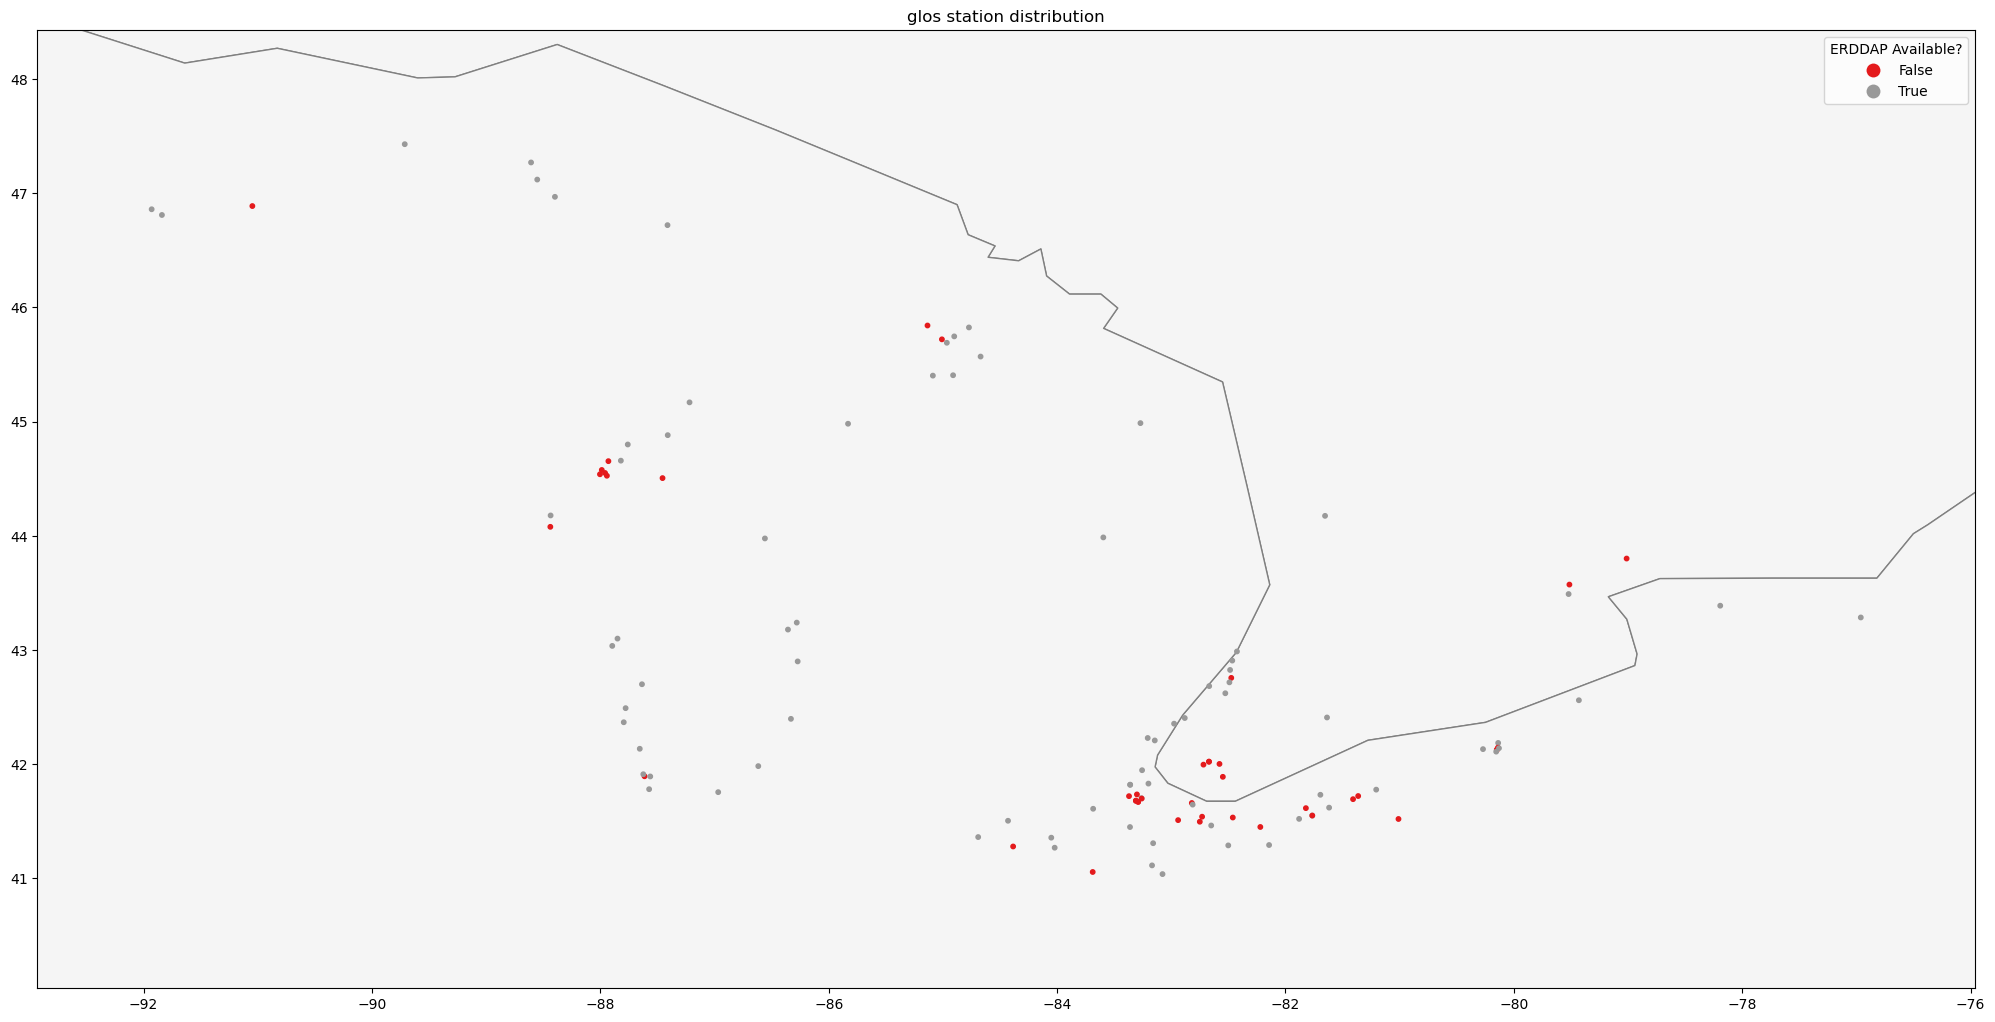

In [39]:
import geopandas
import matplotlib.pyplot as plt

#df = df.loc[df['']]

df.rename(columns=
{'Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].':
     'Variable Names',
 'Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)': 'Station Deployment',
 'Longitude (dec deg)': 'Longitude',
 'Latitude (dec deg)': 'Latitude'},
              inplace=True)

df['Station Deployment'] = \
    df['Station Deployment'].astype(str)


gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df['Longitude'], df['Latitude']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='whitesmoke', 
    edgecolor='grey', 
    figsize=(25,20),
    )

gdf.plot( ax=ax,
         column='erddap_avail', 
         categorical=True, 
         cmap = 'Set1',
         markersize=10, 
         legend=True,
         legend_kwds={'title': "ERDDAP Available?"},
         k=2,
        )



minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx-1, maxx+1)
ax.set_ylim(miny-1, maxy+1)

plt.title('{} station distribution'.format(ra))

plt.show()

Make an interactive map.

When you click on a point the return is the information from the inventory.

In [40]:
gdf_final = gdf.set_crs(epsg=4326)

gdf_final.loc[~gdf_final['geometry'].is_empty == True].drop(columns='Variable Names').explore('erddap_avail',cmap = 'Set1')


## Show me some bad coordinates

_if there are any_

In [41]:
gdf_final.loc[gdf_final['geometry'].is_empty == True]

,RA,Station ID,Dataset (ERDDAP) ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)","RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Variable Names,Additional notes,erddap_avail,geometry


In [18]:
# import urllib.request
# for url in gdf_final.loc[gdf_final['erddap_not_avail'],'Station Description'].str.replace('url: ',''):
#     print(url)
#     try:
#         urllib.request.urlopen(url).getcode()
#     except:
#         print("URL broken: %s" % url)
#         print(gdf_final.loc[gdf_final['Station Description'].str.contains(url,regex=False),'Station ID'])

# Show me the stations where ERDDAP doesn't exist or provide a valid response.

Reasons:
* Station not found on RA erddap
* dataset found but no data for this CY.

In [42]:
gdf_final.loc[~gdf_final['erddap_avail']]

,RA,Station ID,Dataset (ERDDAP) ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)","RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Variable Names,Additional notes,erddap_avail,geometry
17,GLOS,45169,NaN,45169,"Station 45169 - Lakewood Buoy, OH",Cleveland Wind Buoy (45169),41.615,-81.821,moored_buoy,2015-06-27 00:00:00,Y,N,LimnoTech,industry,"wind_from_direction, wind_speed, wind_speed_of...",NaN,False,POINT (-81.82100 41.61500)
22,GLOS,45177,NaN,45177,Ohio St. Beach Buoy,NaN,41.894,-87.613,moored_buoy,>5 year,Y,N,Chicago Parks District,gov_municipal,"sea_water_turbidity, sea_surface_temperature, ...",NaN,False,POINT (-87.61300 41.89400)
24,GLOS,45184,obs_60,45184,Green Bay East,Green Bay East (45184),44.55028,-87.95888,moored_buoy,2018-07-01 00:00:00,Y,N,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, sea_water_tem...",NaN,False,POINT (-87.95888 44.55028)
25,GLOS,45185,obs_59,45185,Green Bay West,Green Bay West (45185),44.57673,-87.98761,moored_buoy,2018-07-01 00:00:00,Y,N,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, sea_water_tem...",NaN,False,POINT (-87.98761 44.57673)
35,GLOS,45176b,NaN,NaN,Cleveland Crib Bottom Sonde (45176b),Cleveland Crib Bottom Sonde (45176b),41.55,-81.765,fixed,2016-06-07 00:00:00,Y,N,LimnoTech,industry,"sea_water_electrical_conductivity, sea_water_p...",NaN,False,POINT (-81.76500 41.55000)
36,GLOS,ALGOMA,NaN,NaN,Algoma Panther Buoy,Algoma is a seasonally deployed moored buoy in...,44.50551,-87.455552,moored_buoy,nan,N,Yf,Unviersity of Wisconsin-Milwaukee,academic,"photosynthetically_available_radiation, mass_c...",NaN,False,POINT (-87.45555 44.50551)
37,GLOS,BEACH2,NaN,NaN,Beach2 Buoy,NaN,42.126653,-80.14903,moored_buoy,2018,Y,N,Regional Science Consortium,nonprofit,"sea_water_temperature (1m), sea_water_specific...",NaN,False,POINT (-80.14903 42.12665)
38,GLOS,BEACH2_T,obs_4,NaN,Beach2 Meteorological Tower,NaN,42.126286,-80.147505,tower,2018,Y,N,Regional Science Consortium,nonprofit,"surface_downwelling_shortwave_flux_in_air, win...",NaN,False,POINT (-80.14750 42.12629)
39,GLOS,BEACH6,NaN,NaN,Beach6 Buoy,NaN,42.144335,-80.139368,moored_buoy,2018,Y,N,Regional Science Consortium,nonprofit,"sea_water_temperature (1m), sea_water_specific...",NaN,False,POINT (-80.13937 42.14433)
40,GLOS,BGUSD2,obs_79,NaN,Sandusky Bay buoy (bgsusd2),Sandusky Bay buoy (bgsusd2),41.496,-82.75,moored_buoy,2017-06-27 00:00:00,Y,N,Bowling Green State University,academic,"wind_from_direction, wind_speed, air_temperatu...",NaN,False,POINT (-82.75000 41.49600)


# Do some checking against the IOOS catalog

only for datasets that we couldn't find in ERDDAP (per above)

In [43]:
from ckanapi import RemoteCKAN
import xarray as xr

problem_datasets = []

ua = 'ckanapiioos/1.0 (+https://ioos.us/)'

#ioos_catalog = RemoteCKAN('https://data.ioos.us', user_agent=ua, get_only=True)
ioos_catalog = RemoteCKAN('https://data.ioos.us', user_agent=ua)
ioos_catalog

gdf_ckan = gdf_final.loc[~gdf_final['erddap_avail']]


for station in gdf_ckan['Station ID'].dropna():

    RA = gdf_ckan.loc[gdf_ckan['Station ID']==station,'RA'].tolist()[0]
    
    print('Station "{}" + RA "{}"'.format(station.lower(), RA.lower()))
    
    # build RA tag query
    fq = '+organization:{}'.format(RA.lower())

    # build free text query
    q = "\""+station.lower()+"\""+" -glider"

    query = ioos_catalog.address + '/dataset/?' + 'q=' + q + '&organization=' + RA.lower()
    
    print('Query: {}'.format(query.replace(" ","%20")))

    datasets = ioos_catalog.action.package_search(q=q, fq=fq)

    

    if datasets['count'] > 0:
        print('\tfound {} dataset(s):'.format(datasets['count']))
        
        for dataset in datasets['results']:
            print('\t',dataset['title'])
            
            
            if dataset['resources']:
                print('\t',dataset['resources'][0]['url'])

                start_date = next(item for item in dataset["extras"] if item["key"] == "temporal-extent-begin")['value']
                end_date = next(item for item in dataset["extras"] if item["key"] == "temporal-extent-end")['value']

                print('\t','Coverage Meta:\n\t\t', start_date,' - ',end_date,'\n')

                if 'thredds' in dataset['resources'][0]['url']:
                    ds = xr.open_dataset(dataset['resources'][0]['url'])

                    time_max = ds.time.max().values

                    time_min = ds.time.min().values


                    print('\tCoverage Data:\n\t\t', time_min,' - ',time_max, '\n')

                    if pd.to_datetime(end_date) < pd.to_datetime(time_max, utc=True):
                        test_date = pd.to_datetime(time_max, utc=True)

                else:
                    test_date = pd.to_datetime(end_date, utc=True)

                if test_date > pd.to_datetime('{}-01-01'.format(cy), utc=True):
                    print('\t{} is valid.'.format(station))
                    break
                else:
                    print('\t{} is not valid.'.format(station))

                    problem_datasets.append(station)
            
            else:
                print('\t{} missing additional metadata'.format(station))
                problem_datasets.append(station)
    else:
        print("\tNo datasets found!")
        problem_datasets.append(station)

Station "45169" + RA "glos"
Query: https://data.ioos.us/dataset/?q="45169"%20-glider&organization=glos
	found 1 dataset(s):
	 45169
	45169 missing additional metadata
Station "45177" + RA "glos"
Query: https://data.ioos.us/dataset/?q="45177"%20-glider&organization=glos
	No datasets found!
Station "45184" + RA "glos"
Query: https://data.ioos.us/dataset/?q="45184"%20-glider&organization=glos
	found 1 dataset(s):
	 45184
	45184 missing additional metadata
Station "45185" + RA "glos"
Query: https://data.ioos.us/dataset/?q="45185"%20-glider&organization=glos
	found 1 dataset(s):
	 45185
	45185 missing additional metadata
Station "45176b" + RA "glos"
Query: https://data.ioos.us/dataset/?q="45176b"%20-glider&organization=glos
	found 1 dataset(s):
	 45176b
	45176b missing additional metadata
Station "algoma" + RA "glos"
Query: https://data.ioos.us/dataset/?q="algoma"%20-glider&organization=glos
	No datasets found!
Station "beach2" + RA "glos"
Query: https://data.ioos.us/dataset/?q="beach2"%20-

Check the datasets that didn't have coverage in ERDDAP or through IOOS catalog and see if they are **Currently Operational?**

In [44]:
gdf_ckan.loc[gdf_ckan['Station ID'].isin(problem_datasets)]

,RA,Station ID,Dataset (ERDDAP) ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)","RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Variable Names,Additional notes,erddap_avail,geometry
17,GLOS,45169,NaN,45169,"Station 45169 - Lakewood Buoy, OH",Cleveland Wind Buoy (45169),41.615,-81.821,moored_buoy,2015-06-27 00:00:00,Y,N,LimnoTech,industry,"wind_from_direction, wind_speed, wind_speed_of...",NaN,False,POINT (-81.82100 41.61500)
22,GLOS,45177,NaN,45177,Ohio St. Beach Buoy,NaN,41.894,-87.613,moored_buoy,>5 year,Y,N,Chicago Parks District,gov_municipal,"sea_water_turbidity, sea_surface_temperature, ...",NaN,False,POINT (-87.61300 41.89400)
24,GLOS,45184,obs_60,45184,Green Bay East,Green Bay East (45184),44.55028,-87.95888,moored_buoy,2018-07-01 00:00:00,Y,N,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, sea_water_tem...",NaN,False,POINT (-87.95888 44.55028)
25,GLOS,45185,obs_59,45185,Green Bay West,Green Bay West (45185),44.57673,-87.98761,moored_buoy,2018-07-01 00:00:00,Y,N,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, sea_water_tem...",NaN,False,POINT (-87.98761 44.57673)
35,GLOS,45176b,NaN,NaN,Cleveland Crib Bottom Sonde (45176b),Cleveland Crib Bottom Sonde (45176b),41.55,-81.765,fixed,2016-06-07 00:00:00,Y,N,LimnoTech,industry,"sea_water_electrical_conductivity, sea_water_p...",NaN,False,POINT (-81.76500 41.55000)
36,GLOS,ALGOMA,NaN,NaN,Algoma Panther Buoy,Algoma is a seasonally deployed moored buoy in...,44.50551,-87.455552,moored_buoy,nan,N,Yf,Unviersity of Wisconsin-Milwaukee,academic,"photosynthetically_available_radiation, mass_c...",NaN,False,POINT (-87.45555 44.50551)
37,GLOS,BEACH2,NaN,NaN,Beach2 Buoy,NaN,42.126653,-80.14903,moored_buoy,2018,Y,N,Regional Science Consortium,nonprofit,"sea_water_temperature (1m), sea_water_specific...",NaN,False,POINT (-80.14903 42.12665)
38,GLOS,BEACH2_T,obs_4,NaN,Beach2 Meteorological Tower,NaN,42.126286,-80.147505,tower,2018,Y,N,Regional Science Consortium,nonprofit,"surface_downwelling_shortwave_flux_in_air, win...",NaN,False,POINT (-80.14750 42.12629)
39,GLOS,BEACH6,NaN,NaN,Beach6 Buoy,NaN,42.144335,-80.139368,moored_buoy,2018,Y,N,Regional Science Consortium,nonprofit,"sea_water_temperature (1m), sea_water_specific...",NaN,False,POINT (-80.13937 42.14433)
40,GLOS,BGUSD2,obs_79,NaN,Sandusky Bay buoy (bgsusd2),Sandusky Bay buoy (bgsusd2),41.496,-82.75,moored_buoy,2017-06-27 00:00:00,Y,N,Bowling Green State University,academic,"wind_from_direction, wind_speed, air_temperatu...",NaN,False,POINT (-82.75000 41.49600)


Print out the available metadata from the IOOS Catalog for the last dataset.

In [45]:
dataset

{'author': None,
 'author_email': None,
 'creator_user_id': 'bb55ba1f-9c92-4539-a676-e1fea85df891',
 'id': 'eba2db0d-524d-44d6-8234-891a917e4947',
 'isopen': False,
 'license_id': None,
 'license_title': None,
 'maintainer': None,
 'maintainer_email': None,
 'metadata_created': '2023-01-18T02:05:32.787446',
 'metadata_modified': '2023-01-18T02:05:32.787461',
 'name': 'wslm4',
 'notes': '',
 'num_resources': 0,
 'num_tags': 11,
 'organization': {'id': '9f14cfa2-a1be-4c1e-843d-a4585ca96b62',
  'name': 'glos',
  'title': 'GLOS',
  'type': 'organization',
  'description': 'GLOS is one of 11 Regional Associations of the Integrated Ocean Observing System (IOOS), working to enhance the ability to collect, deliver, and use ocean and Great Lakes information. IOOS is a partnership among federal, regional, academic and private sector parties that works to provide new tools and forecasts to improve safety, enhance the economy, and protect our environment.',
  'image_url': 'https://s3.amazonaws.com

In [46]:
# GLOS special case as they provide ERDDAP ID

for dataset in gdf_final.loc[(~gdf_final['erddap_avail'] & ~gdf_final['Dataset (ERDDAP) ID'].isna()),'Dataset (ERDDAP) ID'].tolist():
    print(dataset)
    e.dataset_id = dataset
    
    e.constraints = {
                 "time>=": "{}-01-01".format(cy)
            }
        
    e.variables = ['time']
    
    try:
        
        df_data = e.to_pandas(parse_dates=True)
        
        string = '\tDate range: {} - {}'.format(df_data.min()[0],df_data.max()[0])
        
        print(string)
        
        if pd.to_datetime(df_data.max()[0], utc=True) > pd.to_datetime('{}-01-01'.format(cy), utc=True):
            
            datasetid = gdf_final.loc[gdf_final['Dataset (ERDDAP) ID']==dataset,'Station ID'].tolist()[0]
            
            problem_datasets.remove(datasetid)
        
    except:
        print('\tNo valid data')

obs_60
	No valid data
obs_59
	No valid data
obs_4
	Date range: 2022-01-17T05:00:00Z - 2023-03-06T19:30:00Z
obs_79
	Date range: 2022-04-25T14:20:00Z - 2022-10-25T16:10:00Z
obs_17
	Date range: 2022-01-01T00:00:00Z - 2023-03-06T19:30:00Z
obs_18
	Date range: 2022-01-13T19:10:00Z - 2023-03-06T19:30:00Z
obs_19
	Date range: 2022-01-01T00:00:00Z - 2023-03-06T19:30:00Z
obs_16
	No valid data
obs_14
	Date range: 2022-01-01T14:40:00Z - 2022-11-21T18:40:00Z
obs_22
	Date range: 2022-01-01T00:00:00Z - 2023-03-06T19:30:00Z
obs_15
	Date range: 2022-01-01T00:00:00Z - 2023-03-06T19:30:00Z
obs_56
	Date range: 2022-04-21T14:15:00Z - 2022-10-25T18:45:00Z
obs_55
	No valid data
obs_24
	Date range: 2022-01-01T00:00:00Z - 2023-03-06T19:30:00Z
obs_23
	Date range: 2022-01-01T00:00:00Z - 2023-03-06T19:30:00Z
obs_54
	Date range: 2022-06-02T15:17:00Z - 2022-11-06T11:40:00Z
obs_89
	No valid data
obs_10
	Date range: 2022-01-01T00:00:00Z - 2023-01-02T22:30:00Z


In [47]:
gdf_ckan.loc[gdf_ckan['Station ID'].isin(problem_datasets)]

,RA,Station ID,Dataset (ERDDAP) ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)","RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Variable Names,Additional notes,erddap_avail,geometry
17,GLOS,45169,NaN,45169,"Station 45169 - Lakewood Buoy, OH",Cleveland Wind Buoy (45169),41.615,-81.821,moored_buoy,2015-06-27 00:00:00,Y,N,LimnoTech,industry,"wind_from_direction, wind_speed, wind_speed_of...",NaN,False,POINT (-81.82100 41.61500)
22,GLOS,45177,NaN,45177,Ohio St. Beach Buoy,NaN,41.894,-87.613,moored_buoy,>5 year,Y,N,Chicago Parks District,gov_municipal,"sea_water_turbidity, sea_surface_temperature, ...",NaN,False,POINT (-87.61300 41.89400)
24,GLOS,45184,obs_60,45184,Green Bay East,Green Bay East (45184),44.55028,-87.95888,moored_buoy,2018-07-01 00:00:00,Y,N,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, sea_water_tem...",NaN,False,POINT (-87.95888 44.55028)
25,GLOS,45185,obs_59,45185,Green Bay West,Green Bay West (45185),44.57673,-87.98761,moored_buoy,2018-07-01 00:00:00,Y,N,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, sea_water_tem...",NaN,False,POINT (-87.98761 44.57673)
35,GLOS,45176b,NaN,NaN,Cleveland Crib Bottom Sonde (45176b),Cleveland Crib Bottom Sonde (45176b),41.55,-81.765,fixed,2016-06-07 00:00:00,Y,N,LimnoTech,industry,"sea_water_electrical_conductivity, sea_water_p...",NaN,False,POINT (-81.76500 41.55000)
36,GLOS,ALGOMA,NaN,NaN,Algoma Panther Buoy,Algoma is a seasonally deployed moored buoy in...,44.50551,-87.455552,moored_buoy,nan,N,Yf,Unviersity of Wisconsin-Milwaukee,academic,"photosynthetically_available_radiation, mass_c...",NaN,False,POINT (-87.45555 44.50551)
37,GLOS,BEACH2,NaN,NaN,Beach2 Buoy,NaN,42.126653,-80.14903,moored_buoy,2018,Y,N,Regional Science Consortium,nonprofit,"sea_water_temperature (1m), sea_water_specific...",NaN,False,POINT (-80.14903 42.12665)
39,GLOS,BEACH6,NaN,NaN,Beach6 Buoy,NaN,42.144335,-80.139368,moored_buoy,2018,Y,N,Regional Science Consortium,nonprofit,"sea_water_temperature (1m), sea_water_specific...",NaN,False,POINT (-80.13937 42.14433)
44,GLOS,DEFWTP,NaN,NaN,DefianceWTP,NaN,41.27916666666667,-84.385,fixed,2022-03-01 00:00:00,Y,N,City of Defiance,gov_municipal,"phosphate, nitrate, ammonia, sea_water_specif...",NaN,False,POINT (-84.38500 41.27917)
45,GLOS,DGOWAK,NaN,NaN,Dgowak (waves) Weather Buoy,NaN,45.720839,-85.008689,moored_buoy,2022,N,N,Little Traverse Bay Band of Odawa Indians,tribal,"latitude, longitude, air_temperature, sea_wate...",NaN,False,POINT (-85.00869 45.72084)
